<a href="https://colab.research.google.com/github/bbcndoro/bigData/blob/kris/pySparkManipulasidata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Langkah 1: Mengimport library yang dibutuhkan
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 2: Menginisialisasi Spark Session
spark = SparkSession.builder.appName("UCI_Dataset_Analysis").getOrCreate()

# Langkah 3: Membaca dataset menggunakan Pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Membaca dataset ke Pandas DataFrame
pandas_df = pd.read_csv(url, header=None, names=columns)

# Langkah 4: Mengonversi Pandas DataFrame ke Pyspark DataFrame
df = spark.createDataFrame(pandas_df)

# Langkah 5: Menampilkan beberapa baris pertama untuk memverifikasi
df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333332| 3.0540000000000007| 3.758666666666668|1.1986666666666665|          NULL|
| stddev|0.8280661279778628|0.43359431136217386|1.7644204199522624|0.7631607417008414|          NULL|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+

Jumlah baris dalam dataset: 150
+---------------+-----+
|        species|count|
+

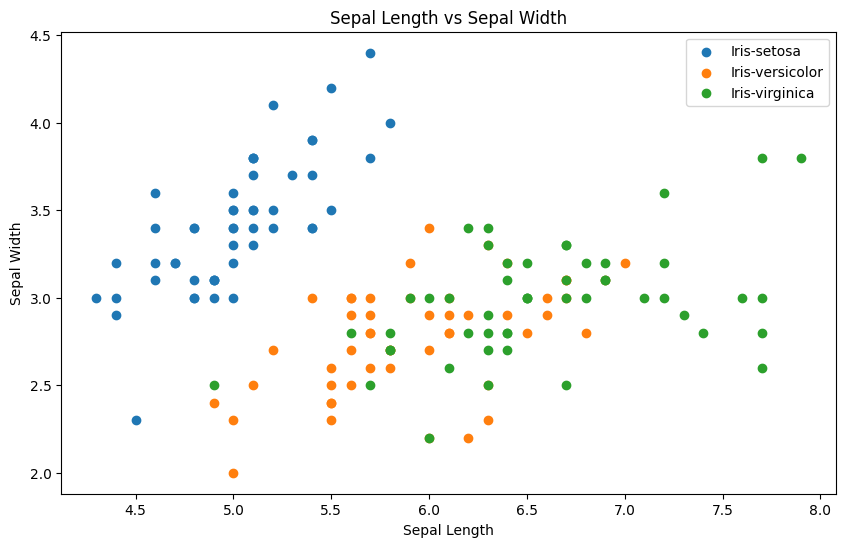

In [2]:
# Langkah 6: Statistik deskriptif
df.describe().show()

# Langkah 7: Menghitung jumlah baris untuk mengetahui ukuran dataset
num_rows = df.count()
print(f"Jumlah baris dalam dataset: {num_rows}")

# Langkah 8: Menampilkan distribusi nilai dari kolom 'species'
df.groupBy("species").count().show()

# Langkah 9: Visualisasi distribusi data menggunakan matplotlib
# Plot sepal length vs sepal width berdasarkan species
plt.figure(figsize=(10,6))
for species in pandas_df['species'].unique():
    subset = pandas_df[pandas_df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

# Langkah 10: Menutup Spark session setelah selesai
spark.stop()